<a href="https://colab.research.google.com/github/great-simonlee/Data_Science_Portfolio.github.io/blob/master/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
import warnings
warnings.filterwarnings('ignore')

In [0]:
n_samples = 40 # The number of data points that are shown onto the grid
x_train = np.linspace(0, 20, n_samples) # The data points are evenly distributed in a range from 0 to 20
y_train = 3 * x_train + 4 * np.random.randn(n_samples) # Randomly chosed variables are added to y-values from 0 to 3.999, and these values may change every time rerun this line of code

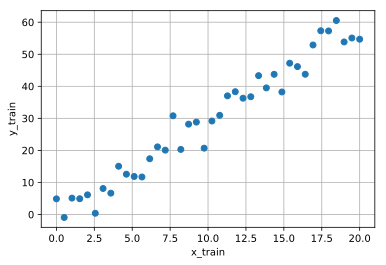

In [0]:
plt.plot(x_train, y_train, 'o')
"""plt.plot(x_train, 3*x_train)"""
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.grid()
plt.show()

# Parameters

In [0]:
# Placeholder are kinda box to store variables temporarily
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)
W = tf.Variable(np.random.randn(), name='weight')
B = tf.Variable(np.random.randn(), name='bias')

# Model

In [0]:
# Simpliest linear regression model "y=ax+b"
pred = tf.add(tf.multiply(X, W), B)

In [0]:
# Cost is the difference between prediction line and data points
# The ultimate purpose is to reduce this value
cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

# Optimization

In [0]:
# The way to see and reduce the cost function is Gradient Descent
# Learning rate is the size of one step at a time in Gradient Descent
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0719 00:39:23.045002 140422713288576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Session

Epoch: 0, Cost: 41.5713, W: 2.1505, B: 1.2673
Epoch: 20, Cost: 7.1683, W: 2.8734, B: 1.2339
Epoch: 40, Cost: 7.1235, W: 2.8792, B: 1.1443
Epoch: 60, Cost: 7.0830, W: 2.8847, B: 1.0592
Epoch: 80, Cost: 7.0463, W: 2.8900, B: 0.9783
Epoch: 100, Cost: 7.0131, W: 2.8949, B: 0.9015
Epoch: 120, Cost: 6.9831, W: 2.8997, B: 0.8286
Epoch: 140, Cost: 6.9559, W: 2.9042, B: 0.7593
Epoch: 160, Cost: 6.9313, W: 2.9084, B: 0.6935
Epoch: 180, Cost: 6.9089, W: 2.9125, B: 0.6309
Epoch: 200, Cost: 6.8887, W: 2.9163, B: 0.5716
Epoch: 220, Cost: 6.8704, W: 2.9200, B: 0.5151
Epoch: 240, Cost: 6.8538, W: 2.9235, B: 0.4616
Epoch: 260, Cost: 6.8388, W: 2.9268, B: 0.4107
Epoch: 280, Cost: 6.8251, W: 2.9299, B: 0.3623


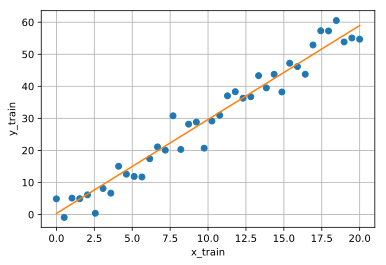

In [0]:
# In Tensorflow, the calculation processes are not occured before the Session below
# To be simple, all the math should be designed above
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  epochs = 300
  
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict={X:x, Y:y})
      
    if not epoch % 20:
      c = sess.run(cost, feed_dict={X:x_train, Y:y_train})
      w = sess.run(W)
      b = sess.run(B)
      print("Epoch: {0}, Cost: {1:.4f}, W: {2:.4f}, B: {3:.4f}".format(epoch, c, w, b))
      
  weight = sess.run(W)
  bias = sess.run(B)
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, x_train * weight + bias)
  plt.xlabel("x_train")
  plt.ylabel("y_train")
  plt.grid()
  plt.show()